In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [8]:
sp500 = web.DataReader('^GSPC', data_source='yahoo', start='1/3/2000', end='4/14/2014')

In [9]:
print(sp500.info())
print(sp500[0:10])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
High         3592 non-null float64
Low          3592 non-null float64
Open         3592 non-null float64
Close        3592 non-null float64
Volume       3592 non-null int64
Adj Close    3592 non-null float64
dtypes: float64(5), int64(1)
memory usage: 196.4 KB
None
                   High          Low         Open        Close      Volume  \
Date                                                                         
2000-01-03  1478.000000  1438.359985  1469.250000  1455.219971   931800000   
2000-01-04  1455.219971  1397.430054  1455.219971  1399.420044  1009000000   
2000-01-05  1413.270020  1377.680054  1399.420044  1402.109985  1085500000   
2000-01-06  1411.900024  1392.099976  1402.109985  1403.449951  1092300000   
2000-01-07  1441.469971  1400.729980  1403.449951  1441.469971  1225200000   
2000-01-10  1464.359985  1441.469971  1441.469971  1457.599976  1

In [11]:
sp500['42d'] = np.round(sp500['Close'].rolling(window=42, center=False).mean(), 2)
sp500['252d'] = np.round(sp500['Close'].rolling(window=252, center=False).mean(), 2)

In [12]:
%matplotlib inline

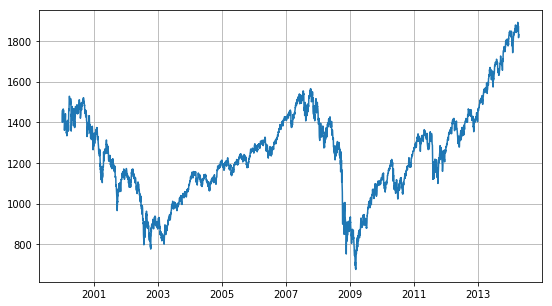

In [27]:
plt.figure(figsize=(9, 5))
plt.plot(sp500['Close'])
plt.grid(True)
plt.show()

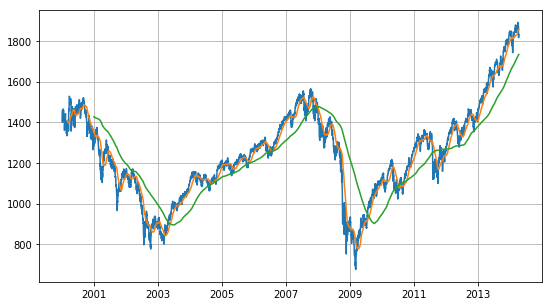

In [26]:
plt.figure(figsize=(9, 5))
plt.plot(sp500[['Close', '42d', '252d']])
plt.grid(True)
plt.show()

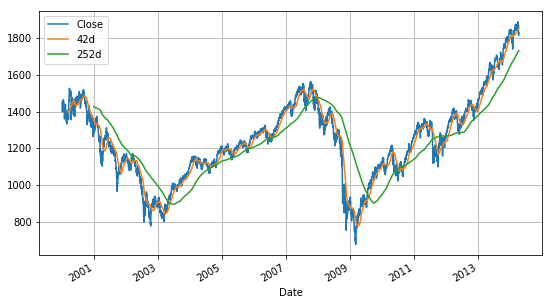

In [25]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(9, 5))
plt.show()

In [17]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
print(sp500['42-252'].tail())

Date
2014-04-08    125.22
2014-04-09    125.88
2014-04-10    125.72
2014-04-11    124.72
2014-04-14    123.89
Name: 42-252, dtype: float64


In [18]:
SD = 50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
print(sp500['Regime'].value_counts())

 1    1489
 0    1232
-1     871
Name: Regime, dtype: int64


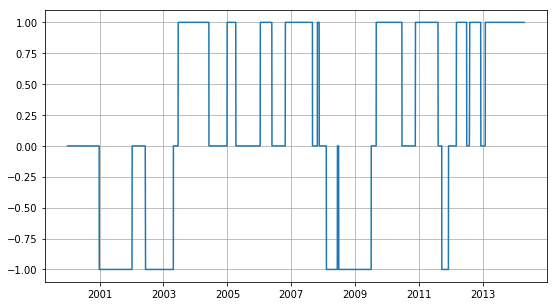

In [24]:
plt.figure(figsize=(9, 5))
plt.plot(sp500[['Regime']])
plt.ylim([-1.1, 1.1])
plt.grid(True)
plt.show()

In [20]:
sp500['Market'] = np.log(sp500['Close']/sp500['Close'].shift(1))
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

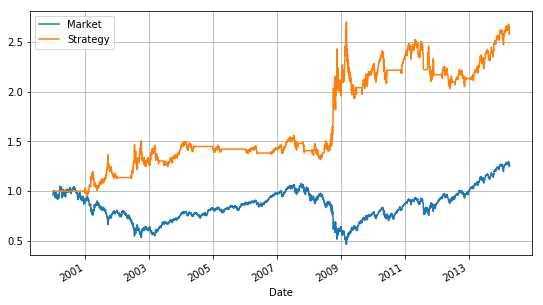

In [22]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(9, 5))
plt.show()